<a href="https://colab.research.google.com/github/Maxime-Bakunzi/data_preprocessing_ml/blob/main/ml_pipeline_Maxime_Bakunzi_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: **Analysis of Student Scores and Performance Prediction**

## Student Name: **Maxime Guy Bakunzi**

---

### **1. Data Sources and Aggregation**

**Where Did I Get the Data?**  
I primarily used a dataset from Kaggle titled *Student Scores*. This dataset contains detailed information about students' scores and other relevant features. You can explore it here: [Kaggle Dataset](https://www.kaggle.com/datasets/markmedhat/student-scores).

While I didn’t use additional sources for this project, I found a few great alternatives for future exploration:  
- **UCI Machine Learning Repository:** A treasure trove of diverse datasets.
  `https://archive.ics.uci.edu/dataset/467/student+academics+performance`  
- **Data.Gov:** Perfect for U.S.-based educational data.  
  `https://catalog.data.gov/dataset/school-quality-reports-data`
- **IEEE Dataport:** Advanced datasets for specialized tasks.  
  `https://ieee-dataport.org/documents/students-performance-scores`

**Data Aggregation?**  
For this project, aggregation wasn’t necessary  as the dataset contains comprehensive features for analysis and modeling. However, I see potential in using additional data to understand how regional or demographic trends affect education outcomes.



---
**Dataset visualization**

In [29]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/MyModels/student-scores.csv')
data.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


---

### **2. Data Format Transformation**

The dataset is already in CSV format, with 2,000 rows and 17 columns.  

**Transformation Goals:**  
- Drop unnecessary columns like `first_name`, `last_name`, and `email`. These don’t add value to our analysis.  
- Encode categorical variables such as `gender` and `career_aspiration` for use in machine learning models.  
- Normalize numeric features like `absence_days` and `weekly_self_study_hours`.  
- Handle outliers and missing values.





---

### **3. Data Exploration**

**Features in the Dataset:**  
- **Numerical:** Subject scores, `absence_days`, and `weekly_self_study_hours`.  
- **Categorical:** `gender`, `career_aspiration`, and `part_time_job`.


#### **EDA Summary**:
1. Distribution of scores across subjects.
2. Correlations between features.
3. Identification of potential outliers in numerical features.

**Key Visualizations:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

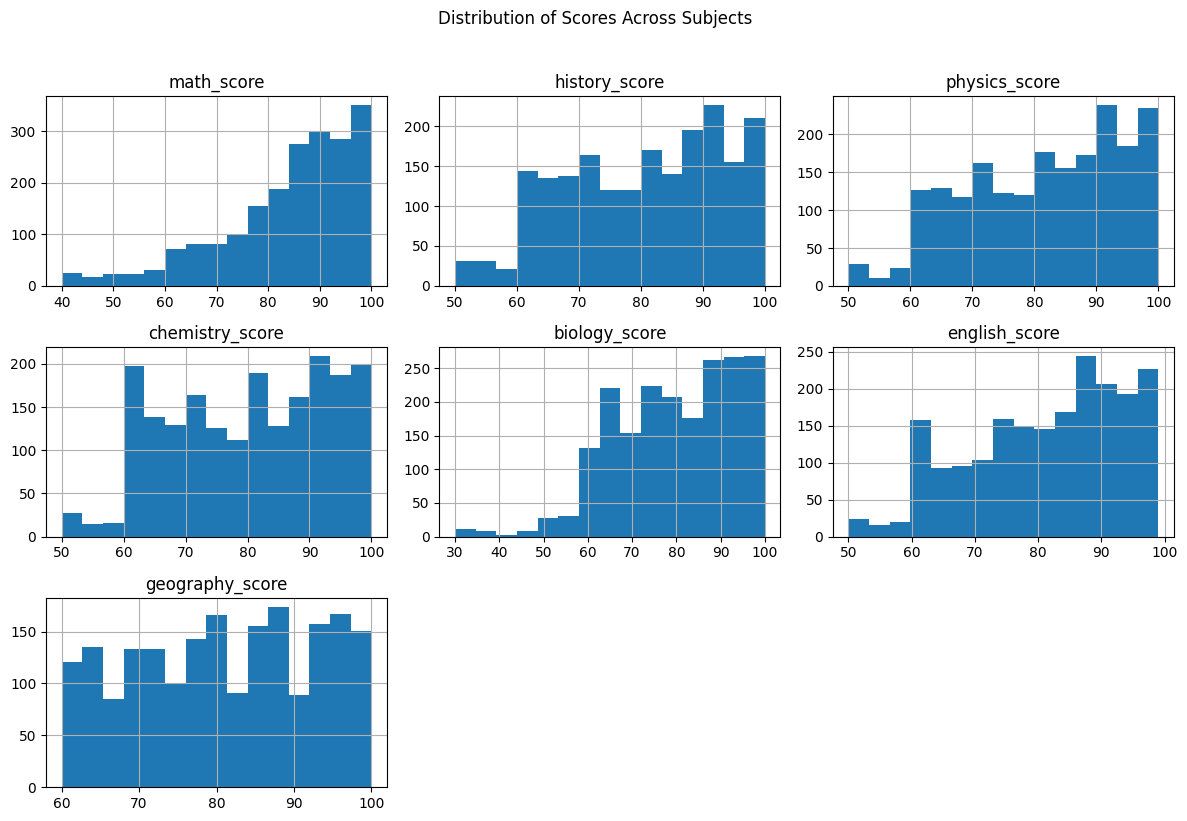

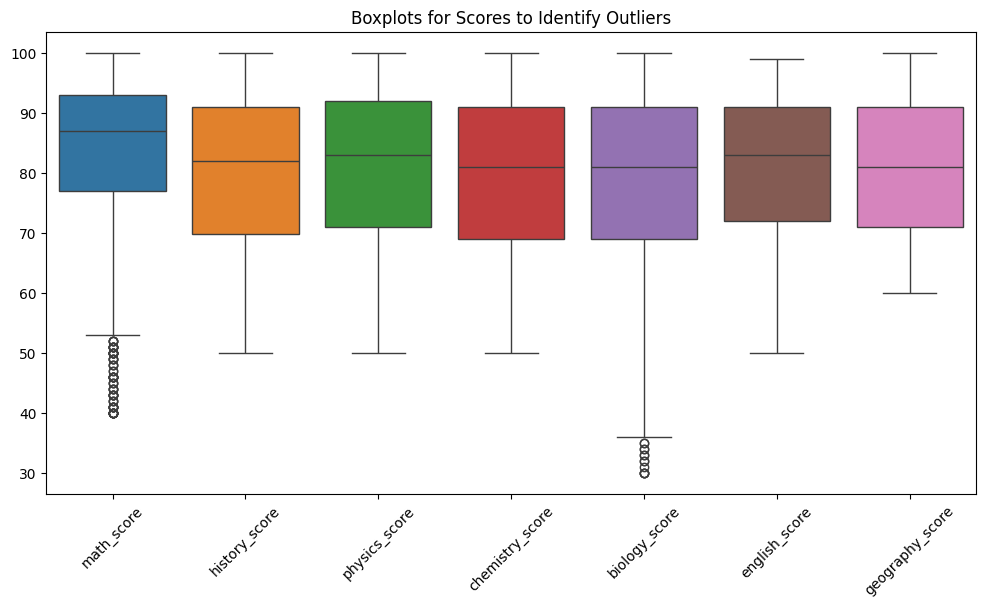

In [31]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/MyModels/student-scores.csv')

# Summarize the dataset
print(df.info())
print(df.describe())

# Visualize score distributions
subjects = ['math_score', 'history_score', 'physics_score',
            'chemistry_score', 'biology_score', 'english_score', 'geography_score']

df[subjects].hist(figsize=(12, 8), bins=15)
plt.suptitle('Distribution of Scores Across Subjects', y=1.02)
plt.tight_layout()
plt.show()

# Check for outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[subjects])
plt.title('Boxplots for Scores to Identify Outliers')
plt.xticks(rotation=45)
plt.show()



---

### **4. Hypothesis Testing**

**My Hypotheses:**  
1. Students with part-time jobs have lower average scores.  
2. There’s a positive correlation between weekly self-study hours and overall performance.  

To test these, I used:  
- **t-tests** for comparing student scores.  
- **Correlation coefficients** for validating relationships.



In [37]:
import numpy as np
from scipy.stats import ttest_ind, pearsonr, spearmanr

# Add a new column for overall scores (mean of all scores)
score_columns = [
    'math_score', 'history_score', 'physics_score', 'chemistry_score',
    'biology_score', 'english_score', 'geography_score'
]
df['overall_score'] = df[score_columns].mean(axis=1)

# T-Test: Students with and without part-time jobs
scores_with_jobs = df[df['part_time_job'] == True]['overall_score']
scores_without_jobs = df[df['part_time_job'] == False]['overall_score']

t_stat, p_value = ttest_ind(scores_with_jobs, scores_without_jobs)
print(f"T-test results:\nT-statistic = {t_stat:.3f}, P-value = {p_value:.3f}")

# Correlation: Weekly self-study hours and overall scores
pearson_corr, pearson_p = pearsonr(df['weekly_self_study_hours'], df['overall_score'])
spearman_corr, spearman_p = spearmanr(df['weekly_self_study_hours'], df['overall_score'])

print("\nCorrelation results:")
print(f"Pearson correlation = {pearson_corr:.3f}, P-value = {pearson_p:.3f}")
print(f"Spearman correlation = {spearman_corr:.3f}, P-value = {spearman_p:.3f}")



T-test results:
T-statistic = -8.785, P-value = 0.000

Correlation results:
Pearson correlation = 0.502, P-value = 0.000
Spearman correlation = 0.457, P-value = 0.000


---

### **5. Handling Sparse/Dense Data and Outliers**

**Dealing with Missing Data:**  
Luckily, there were no missing values in this dataset.  

**Outliers?**  
Using the Interquartile Range (IQR) method, I flagged and counted outliers for each subject.  


#### **Steps**:
- 1. Check for missing data:


In [20]:
print(df.isnull().sum())

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64


- 2. Handle outliers using the IQR method:

In [21]:
Q1 = df[subjects].quantile(0.25)
Q3 = df[subjects].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[subjects] < (Q1 - 1.5 * IQR)) | (df[subjects] > (Q3 + 1.5 * IQR))).sum()
print(f"Outliers per subject:\n{outliers}")


Outliers per subject:
math_score         70
history_score       0
physics_score       0
chemistry_score     0
biology_score      13
english_score       0
geography_score     0
dtype: int64


---

### **6. Data Splitting**

#### **Methodology**:
- Split into 70% training, 15% validation, and 15% testing sets using `train_test_split` from scikit-learn.

---

### **7. Bias Mitigation**

**Steps to take:**  
- Stratify splits based on categorical variables like `gender` and `career_aspiration`. This ensures a balanced representation.





---

### **8. Features for Model Training**

#### **Steps**:
1. Rank features using correlation heatmaps and domain knowledge.
2. Select features like scores and study hours for training.


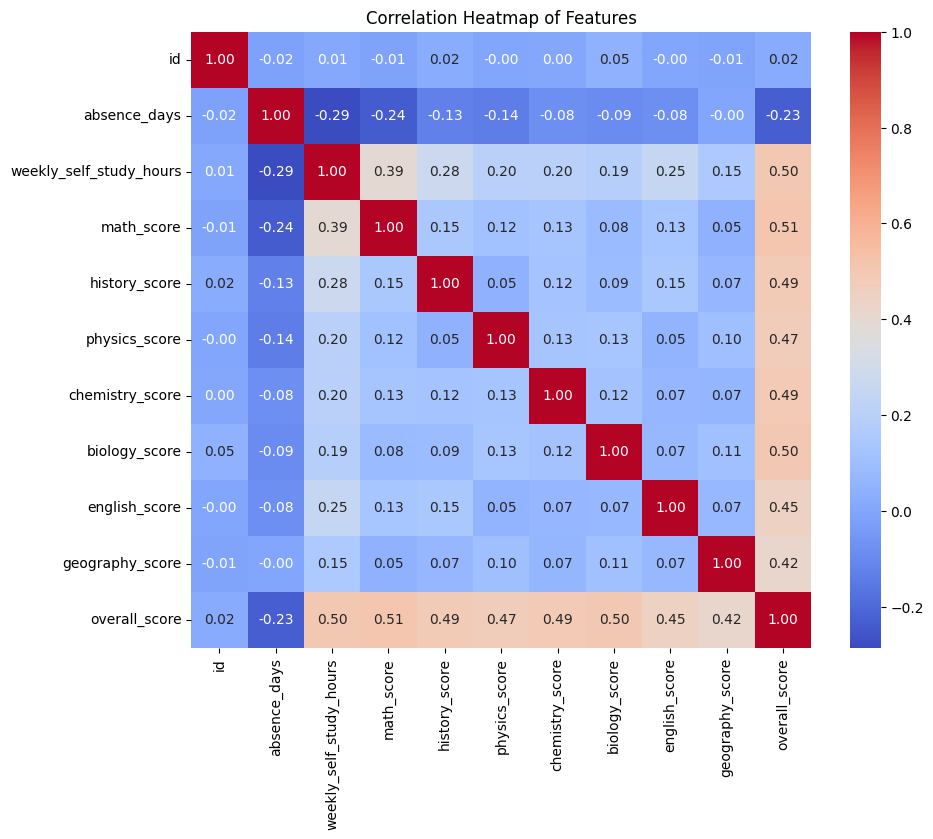

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


---

### **9. Types of Data Handling**

#### **Data Types**:
- **Categorical**: Encode `gender`, `career_aspiration`.
- **Numerical**: Normalize scores and study hours.



---

### **10. Data Transformation for Modeling**

#### **Steps**:
1. Apply Min-Max Scaling or Standardization to numerical data.
2. Use one-hot encoding for categorical variables.


In [40]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define transformations
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first')

# Apply transformations
df_transformed = df.copy()
df_transformed[subjects] = scaler.fit_transform(df_transformed[subjects])
df_transformed = pd.get_dummies(df_transformed, columns=['gender', 'career_aspiration'], drop_first=True)

# Final transformed dataset
df_transformed.head()

,id,first_name,last_name,email,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,math_score,history_score,...,career_aspiration_Game Developer,career_aspiration_Government Officer,career_aspiration_Lawyer,career_aspiration_Real Estate Developer,career_aspiration_Scientist,career_aspiration_Software Engineer,career_aspiration_Stock Investor,career_aspiration_Teacher,career_aspiration_Unknown,career_aspiration_Writer
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,False,3,False,27,-0.790525,0.052463,...,False,False,True,False,False,False,False,False,False,False
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,False,2,False,47,0.495250,0.445147,...,False,False,False,False,False,False,False,False,False,False
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,False,9,True,13,-0.185454,1.309054,...,False,True,False,False,False,False,False,False,False,False
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,False,5,False,3,-0.941792,-0.497296,...,False,False,False,False,False,False,False,False,False,False
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,False,5,False,10,0.041447,-0.261685,...,False,False,False,False,False,False,False,False,True,False


### **11. Data Storage**

#### **Plan**:
Processed data will be stored locally in a CSV format for accessibility. But for long-term storage, I may consider cloud-based options like Google Cloud, AWS S3 or others.
